<a href="https://colab.research.google.com/github/fhallatu/2_version-control-and-branch-management-git/blob/main/Soyaland_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [29]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [30]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

from IPython.display import Image, display

import graphviz

import pydotplus

# **Import Data**

In [31]:
path_dataset = "/content/drive/MyDrive/Data_Used/data lahan.csv"
df = pd.read_csv(path_dataset, sep=',')
df.head()

,Unnamed: 0,Mapping Unit,No.,Kecamatan,Kabupaten,Provinsi,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,...,ktk_tanah,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi,label_evaluasi
0,0,1,1,Talang Empat,Bengkulu Tengah,Bengkulu,26.07,3025,83.51,7,...,61.09,53.11,5.42,1.25,2,1,1,3,1,N
1,1,1,2,Pondok Kelapa,Bengkulu Tengah,Bengkulu,26.07,2655,83.51,7,...,61.09,53.11,5.42,1.25,2,1,1,3,1,N
2,2,2,3,Talang Empat,Bengkulu Tengah,Bengkulu,26.23,3025,83.51,7,...,61.09,53.11,5.42,1.25,2,1,1,1,1,N
3,3,2,4,Pondok Kelapa,Bengkulu Tengah,Bengkulu,26.23,2655,83.51,7,...,61.09,53.11,5.42,1.25,2,1,1,1,1,N
4,4,3,5,Pematang Tiga,Bengkulu Tengah,Bengkulu,25.77,2655,83.51,7,...,61.09,53.11,5.42,1.25,2,1,1,3,1,N


# **Data Preparation**

## **Drop Column**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         247 non-null    int64  
 1   Mapping Unit       247 non-null    int64  
 2   No.                247 non-null    int64  
 3   Kecamatan          247 non-null    object 
 4   Kabupaten          247 non-null    object 
 5   Provinsi           247 non-null    object 
 6   temperatur_rerata  247 non-null    float64
 7   curah_hujan        247 non-null    int64  
 8   kelembaban         247 non-null    float64
 9   bulan_basah        247 non-null    int64  
 10  drainase           247 non-null    int64  
 11  tekstur            247 non-null    int64  
 12  kedalaman_tanah    247 non-null    int64  
 13  ktk_tanah          247 non-null    float64
 14  kejenuhan_basa     247 non-null    float64
 15  ph_h2o             247 non-null    float64
 16  c_organik          247 non

In [33]:
df.drop(["Unnamed: 0","Mapping Unit","No.","Kecamatan","Kabupaten","Provinsi"], axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    int64  
 5   tekstur            247 non-null    int64  
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    int64  
 12  p2o5               247 non-null    int64  
 13  k2o                247 non-null    int64  
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    int64  
 16  label_evaluasi     247 non

## **Data Cleaning**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    int64  
 5   tekstur            247 non-null    int64  
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    int64  
 12  p2o5               247 non-null    int64  
 13  k2o                247 non-null    int64  
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    int64  
 16  label_evaluasi     247 non

In [36]:
df.isna().sum()

temperatur_rerata    0
curah_hujan          0
kelembaban           0
bulan_basah          0
drainase             0
tekstur              0
kedalaman_tanah      0
ktk_tanah            0
kejenuhan_basa       0
ph_h2o               0
c_organik            0
n_total              0
p2o5                 0
k2o                  0
lereng               0
bahaya_erosi         0
label_evaluasi       0
dtype: int64

In [37]:
df.to_csv('lahan.csv')

In [38]:
df = pd.read_csv('lahan.csv')
df

,Unnamed: 0,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,tekstur,kedalaman_tanah,ktk_tanah,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi,label_evaluasi
0,0,26.07,3025,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,3,1,N
1,1,26.07,2655,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,3,1,N
2,2,26.23,3025,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,1,1,N
3,3,26.23,2655,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,1,1,N
4,4,25.77,2655,83.51,7,2,2,100,61.09,53.11,5.42,1.25,2,1,1,3,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,242,22.44,1625,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4,N
243,243,22.44,2772,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4,N
244,244,22.44,2586,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4,N
245,245,17.75,2708,68.50,7,5,1,120,0.00,0.00,5.72,3.30,1,2,1,40,3,N


## **Split Data**

### **Variable Independent & Variable Dependent**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         247 non-null    int64  
 1   temperatur_rerata  247 non-null    float64
 2   curah_hujan        247 non-null    int64  
 3   kelembaban         247 non-null    float64
 4   bulan_basah        247 non-null    int64  
 5   drainase           247 non-null    int64  
 6   tekstur            247 non-null    int64  
 7   kedalaman_tanah    247 non-null    int64  
 8   ktk_tanah          247 non-null    float64
 9   kejenuhan_basa     247 non-null    float64
 10  ph_h2o             247 non-null    float64
 11  c_organik          247 non-null    float64
 12  n_total            247 non-null    int64  
 13  p2o5               247 non-null    int64  
 14  k2o                247 non-null    int64  
 15  lereng             247 non-null    int64  
 16  bahaya_erosi       247 non

In [40]:
df.columns

Index(['Unnamed: 0', 'temperatur_rerata', 'curah_hujan', 'kelembaban',
       'bulan_basah', 'drainase', 'tekstur', 'kedalaman_tanah', 'ktk_tanah',
       'kejenuhan_basa', 'ph_h2o', 'c_organik', 'n_total', 'p2o5', 'k2o',
       'lereng', 'bahaya_erosi', 'label_evaluasi'],
      dtype='object')

In [41]:
def get_split_variabel(dataset):
  x = dataset.iloc[:,:-1]
  y = dataset.iloc[:,-1]

  return x,y

In [42]:
get_split_variabel(df)

(     Unnamed: 0  temperatur_rerata  curah_hujan  kelembaban  bulan_basah  \
 0             0              26.07         3025       83.51            7   
 1             1              26.07         2655       83.51            7   
 2             2              26.23         3025       83.51            7   
 3             3              26.23         2655       83.51            7   
 4             4              25.77         2655       83.51            7   
 ..          ...                ...          ...         ...          ...   
 242         242              22.44         1625       68.50            7   
 243         243              22.44         2772       68.50            7   
 244         244              22.44         2586       68.50            7   
 245         245              17.75         2708       68.50            7   
 246         246              17.90         2586       68.50            7   
 
      drainase  tekstur  kedalaman_tanah  ktk_tanah  kejenuhan_basa  ph_h2

# **Classification And Regression Tree**

In [43]:
class cart:

    def __init__(self, dataset):
      self.dataset = dataset

    def cart(self):
      x, y = get_split_variabel(self.dataset)
      self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
      self.model = self.get_cart_model(self.x_train, self.y_train)

      self.y_pred = self.model.predict(self.x_test)
      print(self.y_pred)

      self.display_pohon(self.model, self.x_test, self.y_test)
    
    def get_cart_model(self, train_data, train_label):
      dt = tree.DecisionTreeClassifier()
      model = dt.fit(train_data, train_label)

      return model
    
    def display_pohon(self, model, test_data, test_label):
      dot_data = tree.export_graphviz(model, out_file=None, feature_names=test_data.columns, class_names=test_label.values, rounded=True, special_characters=True, filled=True)
      graph = pydotplus.graph_from_dot_data(dot_data)
      display(Image(graph.create_png()))

['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'S3' 'S3' 'N'
 'S3' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'S3' 'N' 'N' 'N' 'N']


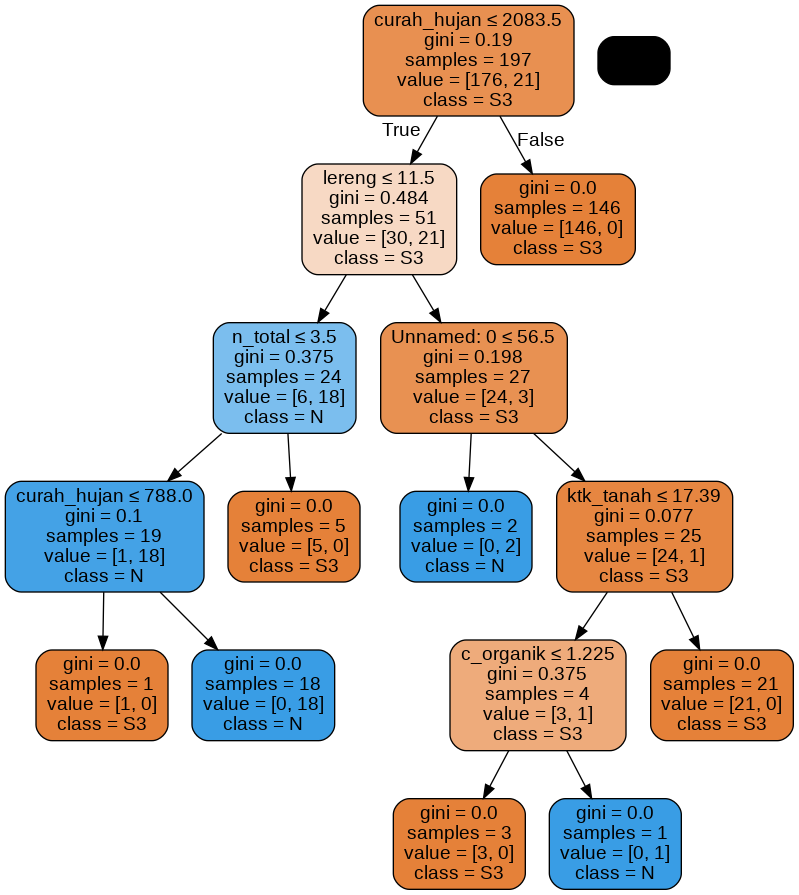

In [44]:
cart(df).cart()